# **EJERCICIO 1** 
## k-means e hierarchical clustering por:
## Mauricio Alexander Vargas
*1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.   
4. Entrenar el modelo configurando los diferentes hiperparámetros.  
5. Evaluar el desempeño del modelo con métricas como Coeficiente 
de Silhouette, Índice de Calinski-Harabasz, etc.  
6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo.  
7. Interpretar, analizar y documentar los resultados obtenidos. .  
8. Cargar en GitHub los códigos de los modelos 
diseñados https://github.com/*  

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
dataset.shape

(200, 5)

In [5]:
# Información general (columnas, tipos de datos, valores nulos)
print("\nInformación del dataset:")
print(dataset.info()) # Muestra información sobre el dataset


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


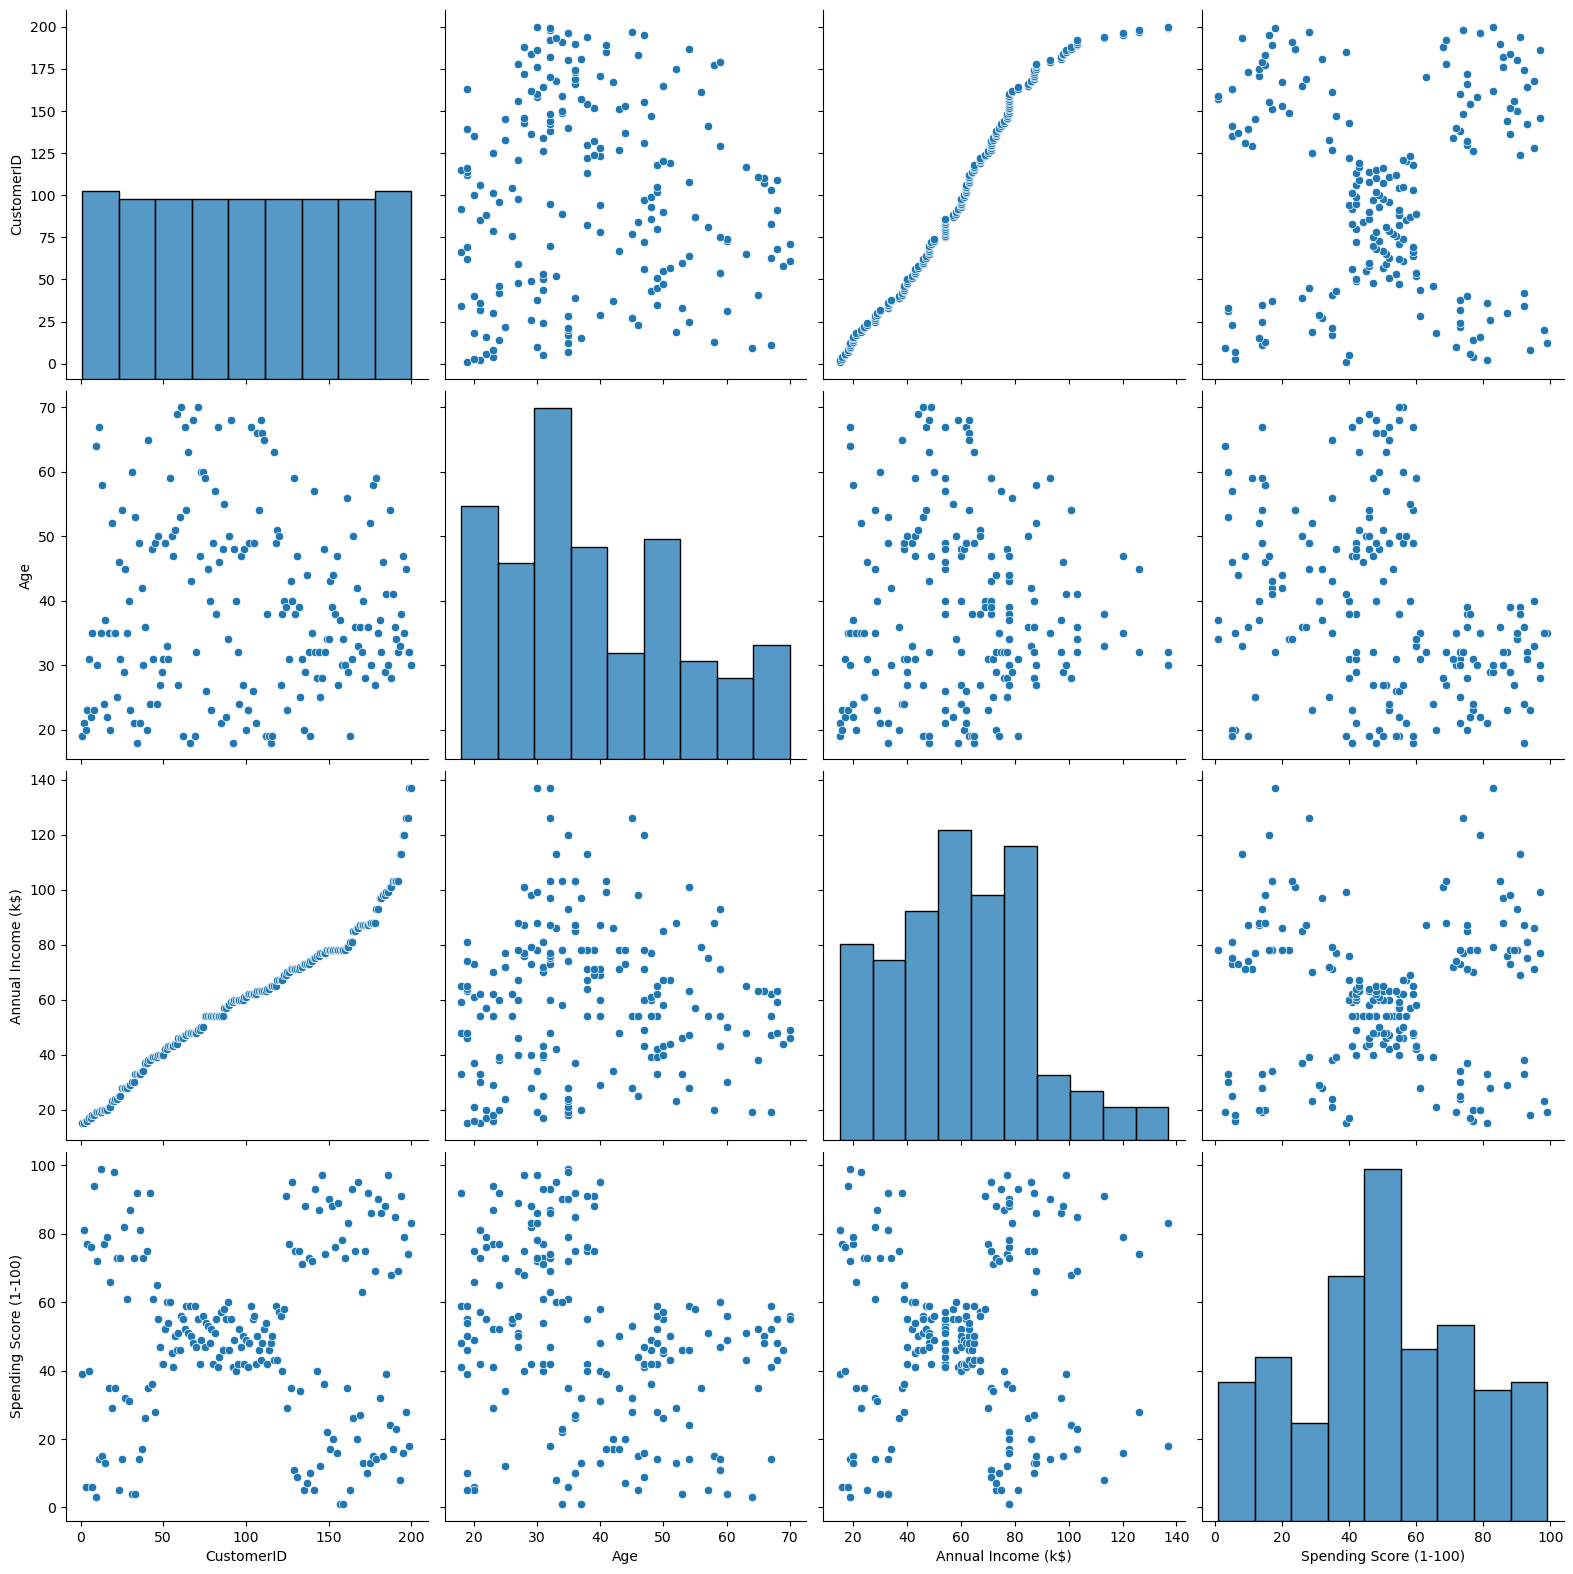

In [9]:
sns.pairplot(dataset.dropna(), size=4,kind='scatter')

In [10]:
# Copiar el dataset para no modificar el original
df = dataset.copy()

# Convertir género a numérico
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Eliminar columna CustomerID
df = df.drop('CustomerID', axis=1)

In [11]:
# Calcular correlaciones
correlation_matrix = df.corr(numeric_only=True)

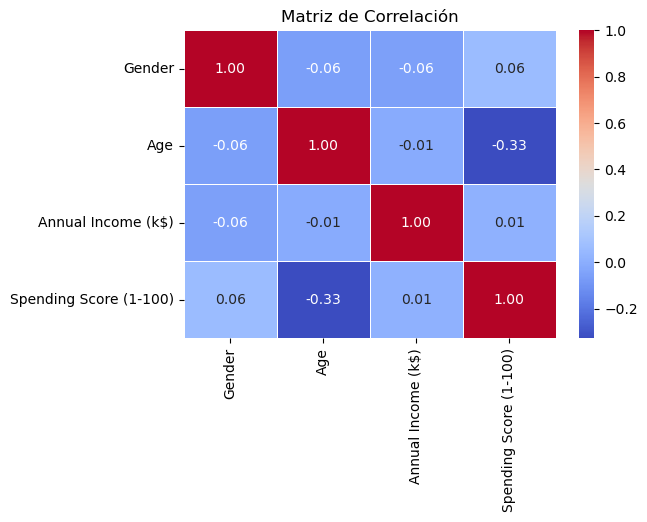

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,       # Muestra valores numéricos
    cmap='coolwarm',  # Paleta de colores
    fmt=".2f",        # Formato de 2 decimales
    linewidths=0.5
)
plt.title("Matriz de Correlación")
plt.show()

In [13]:
# Matriz de correlación
corr_matrix = df.corr()
corr_matrix

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


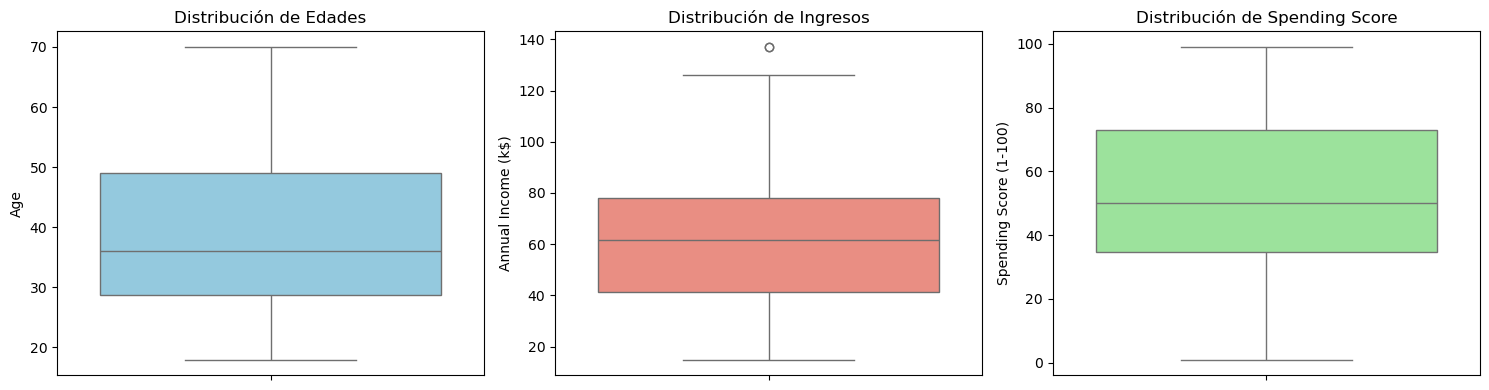

In [15]:
plt.figure(figsize=(15, 4))

# Edad
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Distribución de Edades')

# Ingresos Anuales
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Annual Income (k$)'], color='salmon')
plt.title('Distribución de Ingresos')

# Spending Score
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Spending Score (1-100)'], color='lightgreen')
plt.title('Distribución de Spending Score')

plt.tight_layout()
plt.show()

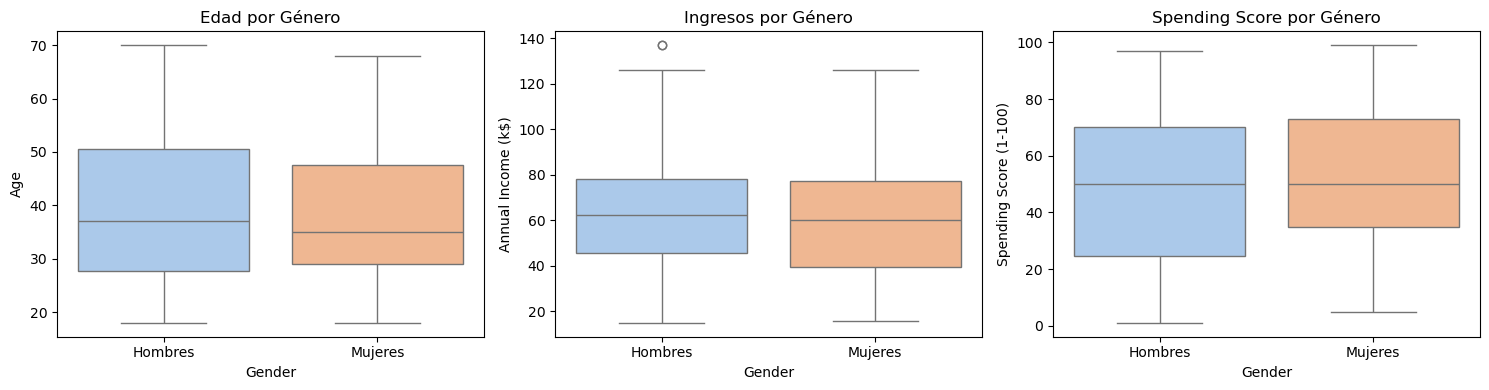

In [16]:
plt.figure(figsize=(15, 4))

# Edad vs Género
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=df, palette='pastel')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.title('Edad por Género')

# Ingresos vs Género
plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='pastel')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.title('Ingresos por Género')

# Spending Score vs Género
plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='pastel')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.title('Spending Score por Género')

plt.tight_layout()
plt.show()

In [23]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


# **K-MEANS** 

In [25]:
# Seleccionar variables para clustering
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar datos (K-Means es sensible a escalas)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

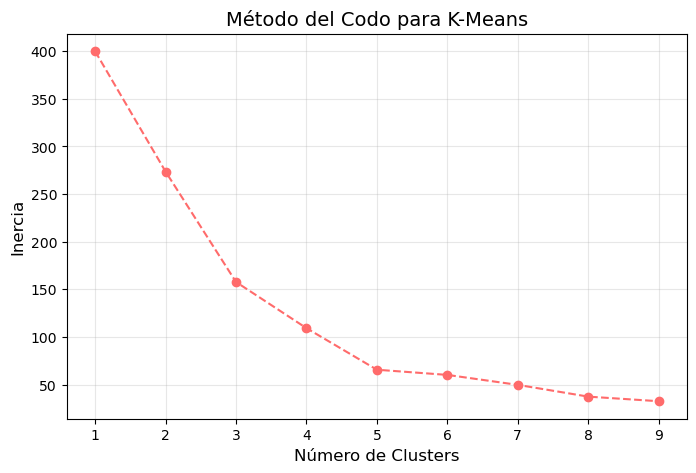

In [26]:
# Calcular inercia para diferentes números de clusters
inertias = []
Nc = range(1, 10)

for n_clusters in Nc:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(Nc, inertias, marker='o', linestyle='--', color='#FF6B6B')
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.title('Método del Codo para K-Means', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

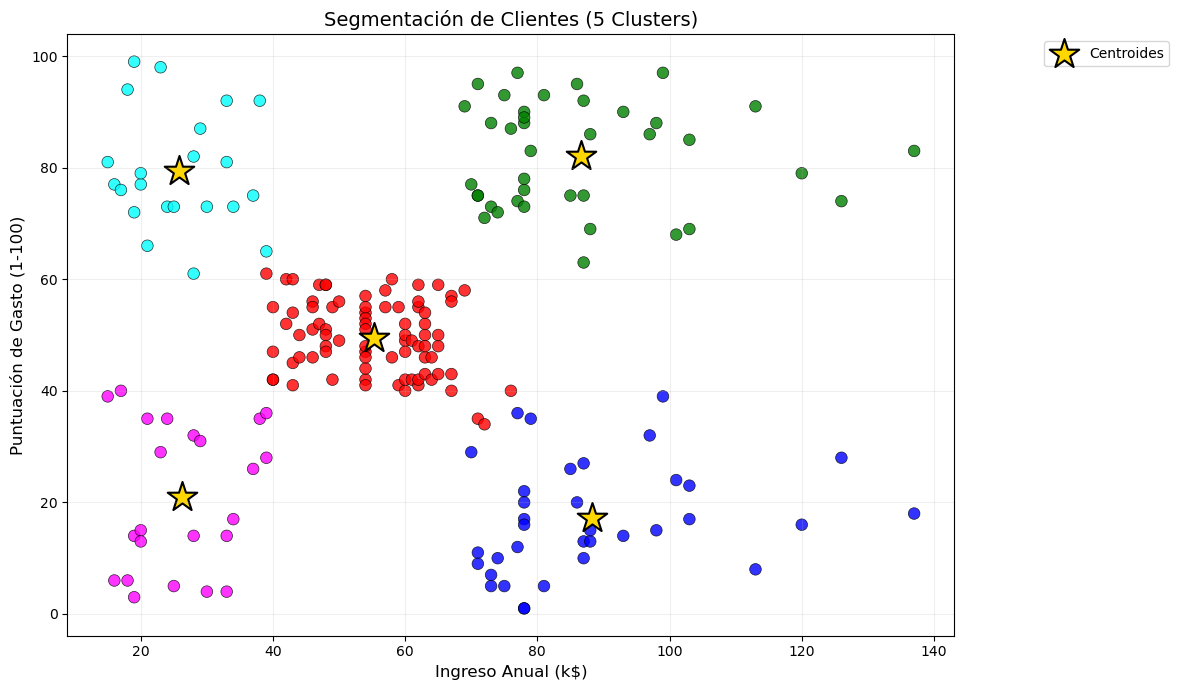

In [106]:
# 1. Definir variables 
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Aplicar K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Asignar colores a los clusters (añadimos más colores)
colores = ['red', 'green', 'cyan', 'blue', 'magenta']
asignar = [colores[label] for label in labels]

# 4. Graficar
plt.figure(figsize=(12, 7))

# Puntos de datos
plt.scatter(
    x=X['Annual Income (k$)'], 
    y=X['Spending Score (1-100)'],
    c=asignar,
    s=70,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

# Centroides (marcados con estrellas)
plt.scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    marker='*',
    s=500,  # Tamaño aumentado
    c='gold',
    edgecolor='black',
    linewidth=1.5,
    label='Centroides'
)

plt.title('Segmentación de Clientes (5 Clusters)', fontsize=14)
plt.xlabel('Ingreso Anual (k$)', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')  # Leyenda fuera del gráfico
plt.grid(alpha=0.2)
plt.tight_layout()
import numpy as np
plt.show()

In [62]:
new_data = np.array([[80, 20]])  # Formato: [Ingreso, Gasto]
new_data_scaled = scaler.transform(new_data)  # Escalar con el mismo scaler
new_label = kmeans.predict(new_data_scaled)

print(f"\nPredicción para nuevo dato {new_data[0]}:")
print(f"Cluster: {new_label[0]}")
print(f"Color: {colores[new_label[0]]}")


Predicción para nuevo dato [80 20]:
Cluster: 4
Color: magenta


In [126]:
# Calcular medidas de calidad para K-Means
print("\nMedidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X_scaled, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X_scaled, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X_scaled, labels))


Medidas de calidad para K-Means:
Puntaje de silueta: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357
Inertia (suma de cuadrados dentro de los clusters): 44448.4554479337
Davies-Bouldin Index: 0.5722356162263352


# **hierarchical clustering** 

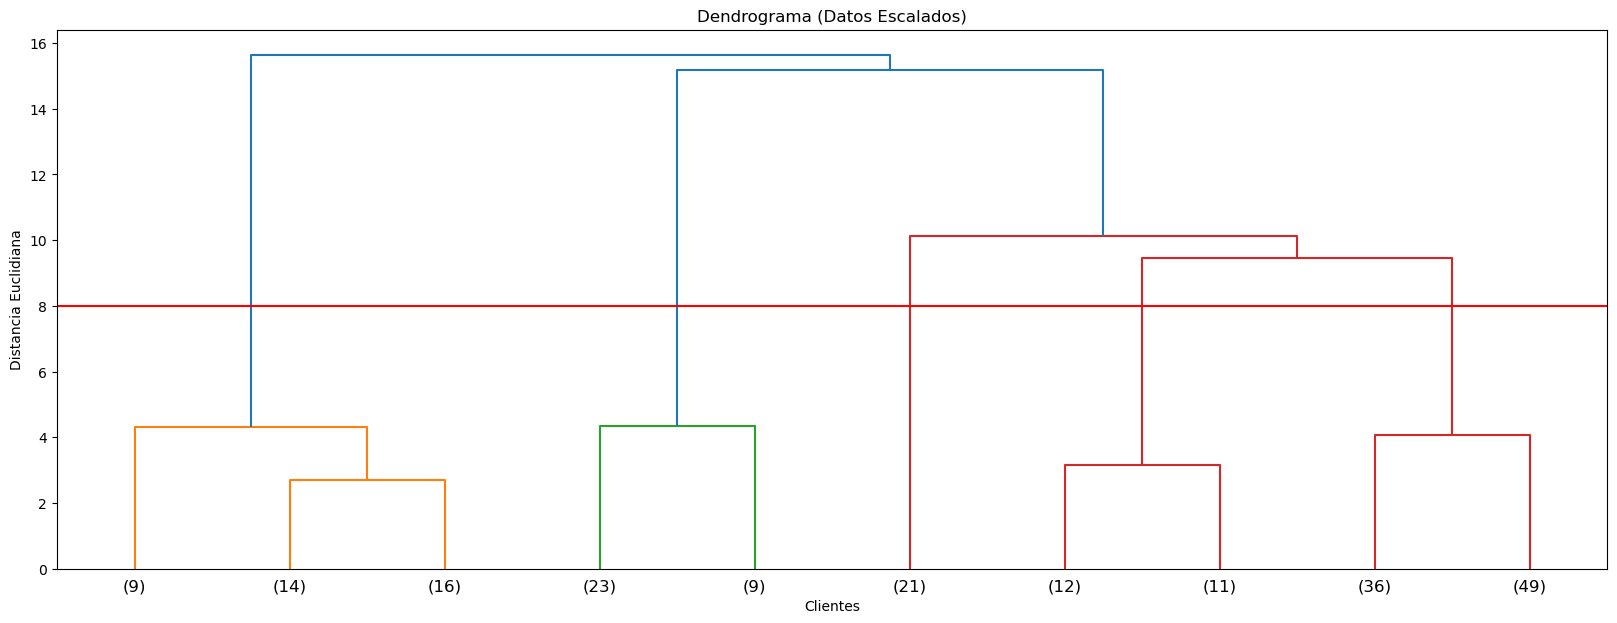

In [104]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X contiene solo 'Annual Income' y 'Spending Score'

# Calcular linkage con datos escalados
ward_clustering = linkage(X_scaled, method="ward", metric="euclidean")

# Graficar dendrograma truncado
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering, truncate_mode='lastp', p=10)  # Truncar a 10 clusters
plt.axhline(y=8, color='r', linestyle='-')
plt.title('Dendrograma (Datos Escalados)')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [82]:
hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [84]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red', 'green', 'cyan', 'blue', 'magenta']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

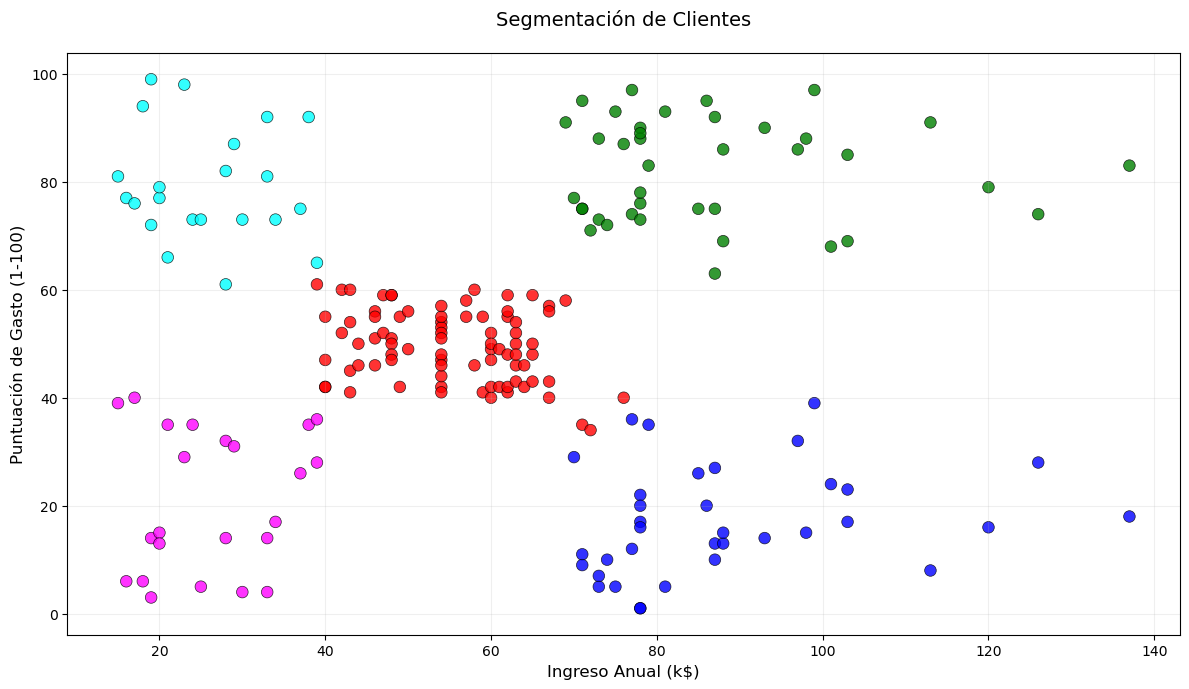

In [94]:
plt.figure(figsize=(12, 7))

plt.scatter(
    X['Annual Income (k$)'], 
    X['Spending Score (1-100)'],
    c=asignar,                
    s=70,                     
    alpha=0.8,                
    edgecolor='black',        
    linewidth=0.5             
)

plt.title('Segmentación de Clientes', fontsize=14, pad=20)
plt.xlabel('Ingreso Anual (k$)', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)
plt.grid(alpha=0.2)           
plt.tight_layout()       

plt.show()

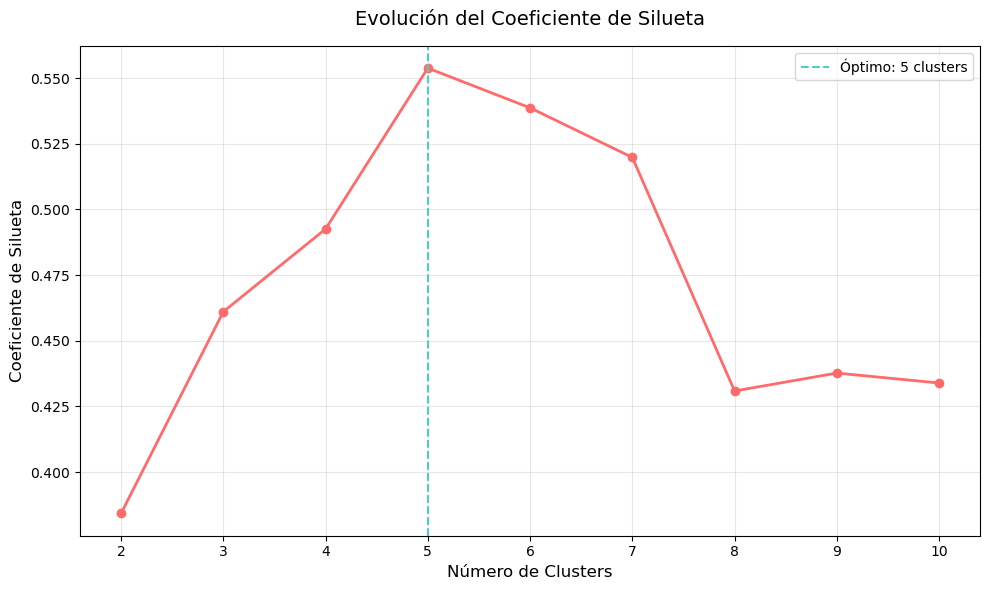

In [102]:
# 1. Seleccionar y escalar las variables relevantes (como en K-means)
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Rango ajustado de clusters a evaluar (2-10)
range_n_clusters = range(2, 11)
valores_medios_silhouette = []

# 3. Calcular silhouette para cada número de clusters
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric = 'euclidean',
                    linkage = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X_scaled)  # Usar datos escalados
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)  # Calcular con datos escalados
    valores_medios_silhouette.append(silhouette_avg)

# 4. Encontrar el número óptimo de clusters
optimal_clusters = range_n_clusters[valores_medios_silhouette.index(max(valores_medios_silhouette))]

# 5. Graficar con formato consistente
plt.figure(figsize=(10, 6))  # Mismo tamaño que gráficos anteriores
plt.plot(range_n_clusters, valores_medios_silhouette, marker='o', color='#FF6B6B', linewidth=2)
plt.axvline(x=optimal_clusters, color='#4ECDC4', linestyle='--', label=f'Óptimo: {optimal_clusters} clusters')
plt.title('Evolución del Coeficiente de Silueta', fontsize=14, pad=15)
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Coeficiente de Silueta', fontsize=12)
plt.xticks(range(2, 11))  # Mostrar todos los valores evaluados
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [120]:
# Calcular medidas de calidad para Clustering Jerárquico (versión ajustada)
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X_scaled, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X_scaled, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X_scaled, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.5538089226688662
Índice de Calinski-Harabasz: 244.4103258659682
Davies-Bouldin Index: 0.5778621190740154


In [130]:

hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [132]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.5529945955148897
Índice de Calinski-Harabasz: 243.07142892964563
Davies-Bouldin Index: 0.5782207452369452


In [134]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.7179298392392908, array([262.5626341 ,  81.17935867, 262.5626341 , ..., 394.8596576 ,
        17.82320585, 394.8596576 ]))
